<a href="https://colab.research.google.com/github/noreallyimfine/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [9]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [10]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [11]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [12]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [13]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [14]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [15]:
df = pd.merge(income, lifespan)
df.shape

(40437, 4)

In [16]:
df = pd.merge(df, population)
df.shape

(40437, 5)

In [17]:
entities_variables = ['country', 'name', 'world_6region']
entities = entities[entities_variables]
entities.shape

(273, 3)

In [18]:
df = pd.merge(entities, df,  left_on='country', right_on='geo')
print(df.shape)
df.head()

(40437, 8)


,country,name,world_6region,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,Afghanistan,south_asia,afg,1800,603,28.21,3280000
1,afg,Afghanistan,south_asia,afg,1801,603,28.20,3280000
2,afg,Afghanistan,south_asia,afg,1802,603,28.19,3280000
3,afg,Afghanistan,south_asia,afg,1803,603,28.18,3280000
4,afg,Afghanistan,south_asia,afg,1804,603,28.17,3280000


In [19]:
df.drop('geo', axis=1, inplace=True)
df.head()

,country,name,world_6region,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,Afghanistan,south_asia,1800,603,28.21,3280000
1,afg,Afghanistan,south_asia,1801,603,28.20,3280000
2,afg,Afghanistan,south_asia,1802,603,28.19,3280000
3,afg,Afghanistan,south_asia,1803,603,28.18,3280000
4,afg,Afghanistan,south_asia,1804,603,28.17,3280000


In [20]:
df.rename(columns={'name': 'country',
                   'world_6region': 'region',
                   'time': 'year',
                   'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
                   'life_expectancy_years': 'Life Expectancy',
                   'population_total': 'population',
                   'country': 'country code'}, inplace=True)

df.head()

,country code,country,region,year,income,Life Expectancy,population
0,afg,Afghanistan,south_asia,1800,603,28.21,3280000
1,afg,Afghanistan,south_asia,1801,603,28.20,3280000
2,afg,Afghanistan,south_asia,1802,603,28.19,3280000
3,afg,Afghanistan,south_asia,1803,603,28.18,3280000
4,afg,Afghanistan,south_asia,1804,603,28.17,3280000


## Explore data

In [21]:
china = df[df['country'] == "China"]
china.head()

,country code,country,region,year,income,Life Expectancy,population
6836,chn,China,east_asia_pacific,1800,984,32.0,321675013
6837,chn,China,east_asia_pacific,1801,984,32.0,324408862
6838,chn,China,east_asia_pacific,1802,984,32.0,327165946
6839,chn,China,east_asia_pacific,1803,984,32.0,329946461
6840,chn,China,east_asia_pacific,1804,984,32.0,332750607


In [0]:
china.head()

## Plot visualization

In [0]:
now = df[df['year']==2018]
sns.relplot(x='income', y='Life Expectancy', hue='region', size='population', data=now)

In [0]:
qatar_now = now[(now.income > 80000) & (now.country == 'Qatar')]

In [0]:


sns.relplot(x='income', y='Life Expectancy', hue='region', size='population', data=now)

plt.text(x=qatar_now.income, y=qatar_now['Life Expectancy'], s='Qatar')

In [0]:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))
y_pos

## Analyze outliers

In [0]:
from matplotlib import animation

<Figure size 432x288 with 0 Axes>

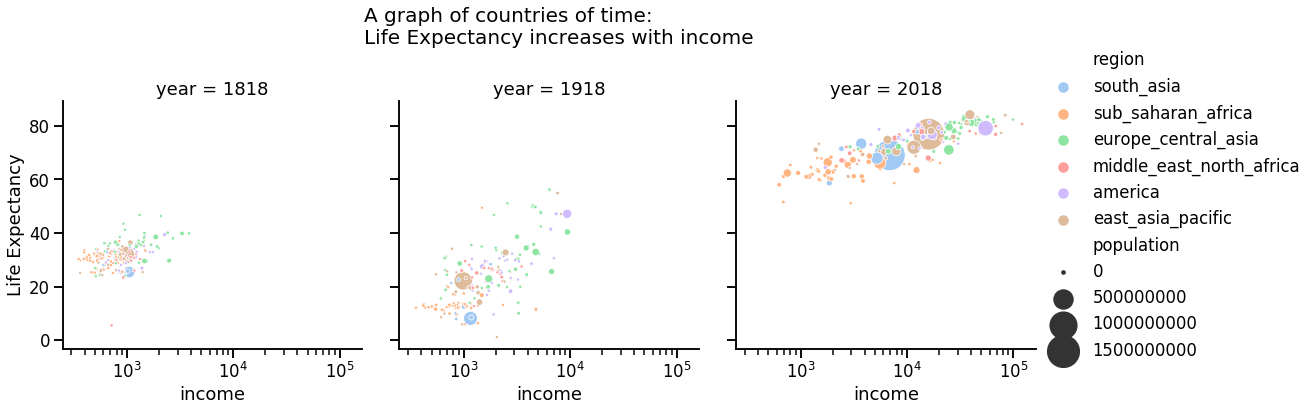

In [65]:
years = [1818, 1918, 2018]

centuries = df[df.year.isin(years)]
sns.set_context('talk')

fig = plt.figure()

g = sns.relplot(x='income',y='Life Expectancy', hue='region',col='year', size='population', data=centuries, sizes=(10,1000), palette='pastel')

ax.set_xticklabels(['1000', '10000', '100000'])
plt.xscale('log')

plt.suptitle('''A graph of countries of time:
                Life Expectancy increases with income''', x=0.4, y=1.15, fontsize=20);

In [0]:
hmmm = df[(df['year'] == 1818) & (df['Life Expectancy'] < 20)]
hmm

In [0]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

decades = df[df.year.isin(years)]





In [71]:
decades.head()

,country code,country,region,year,income,Life Expectancy,population
118,afg,Afghanistan,south_asia,1918,849,7.89,5704092
138,afg,Afghanistan,south_asia,1938,963,31.33,6901330
158,afg,Afghanistan,south_asia,1958,1183,37.23,8680946
178,afg,Afghanistan,south_asia,1978,1189,45.02,13237734
198,afg,Afghanistan,south_asia,1998,956,50.12,18863999


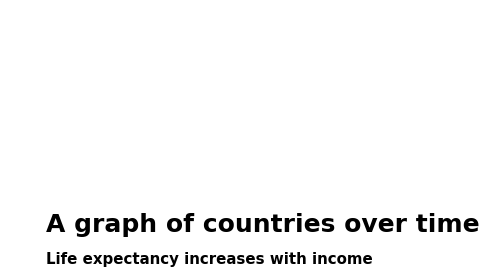

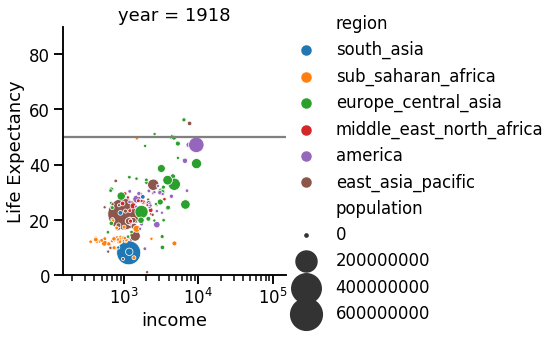

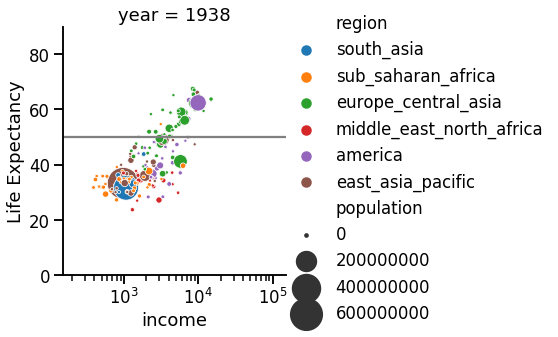

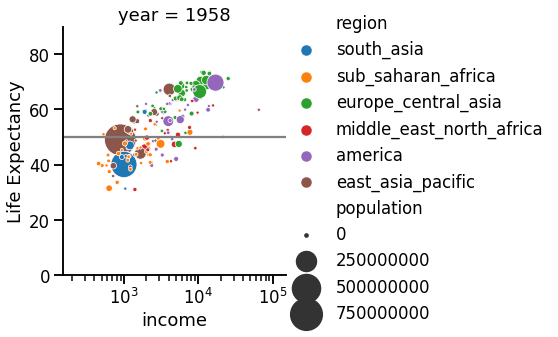

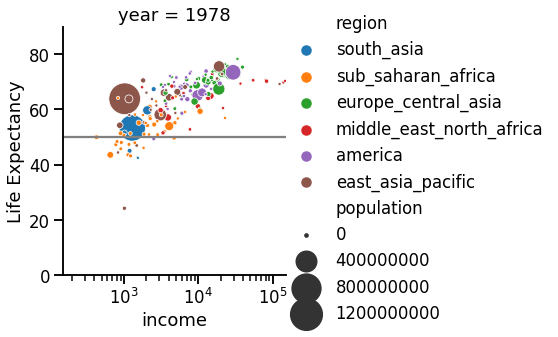

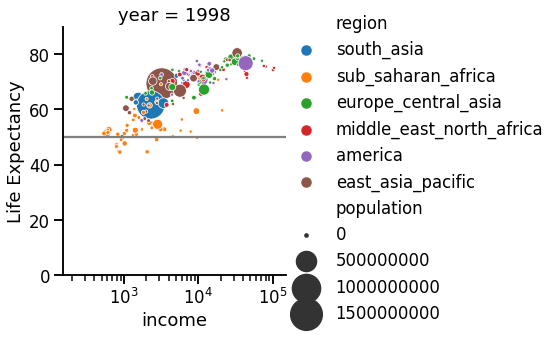

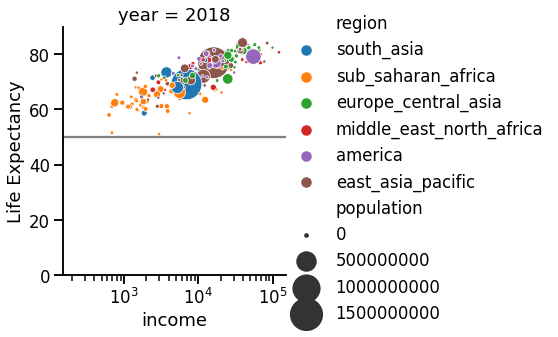

In [132]:
sns.set_context('talk')


fig, ax = plt.subplots()
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#ax.grid(False)
plt.axis('off')
plt.grid(b=None)
plt.text(s='A graph of countries over time', fontsize=25, fontweight='demibold', x=0, y=0);
plt.text(s='Life expectancy increases with income', fontsize=15, fontweight='semibold', x=0, y=-0.15)

for year in years:
  g = sns.relplot(x='income',y='Life Expectancy', hue='region',col='year', size='population', data=decades[decades.year==year], sizes=(10, 1000))
  
  
  plt.xscale('log')
  plt.xlim(150, 150000)
  plt.ylim(0, 90)
  plt.axhline(y=50, color='grey')
  


Got the size of the bubbles working well, but really struggling with the titles - its stuck on the bottom I cant move it to the top

Update:  Got it!

## Plot multiple years

In [95]:
### Animation Stretch
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Point out a story

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project